# Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data

In [37]:
data = datasets.load_breast_cancer()

In [40]:
X = data.data
y = data.target

# Train

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

# Evaluation

Sources:
- <a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">Koo Ping Shung - Accuracy, Precision, Recall or F1?</a>

### Confusion Matrix

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td>TN - True Negative</td>
    <td>FP - False Positive</td>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td>FN - False Negative</td>
    <td>TP - True Positive</td>
  </tr>
</table>

</center>

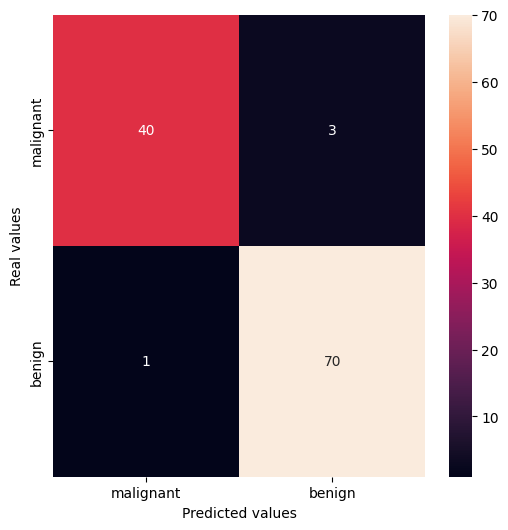

In [74]:
from sklearn.metrics import confusion_matrix

y_pred = logReg.predict(X_test)

cnfMtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cnfMtx, annot=True)
plt.xticks([0.5,1.5], data.target_names)
plt.yticks([0.5,1.5], data.target_names)
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()

### Accuracy

$$
\text{Accuracy} = \frac{
  \textcolor{#b3ffa6}{TN}+\textcolor{#b3ffa6}{TP}}{
  \textcolor{#b3ffa6}{TN}+\textcolor{#ffa6a6}{FP}+\textcolor{#ffa6a6}{FN}+\textcolor{#b3ffa6}{TP}}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: #b3ffa6;">TN - True Negative</td>
    <td style="background-color: #ffa6a6;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: #ffa6a6;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [78]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Accuracy {:.0f}%".format(
    acc*100
))

Accuracy 96%


### Precision

$$
\text{Precision} = \frac{
  \textcolor{#b3ffa6}{TP}}{
  \textcolor{#b3ffa6}{TP}+\textcolor{#ffa6a6}{FP}}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: ;">TN - True Negative</td>
    <td style="background-color: #ffa6a6;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: ;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [79]:
from sklearn.metrics import precision_score

pre = precision_score(y_test, y_pred)

print("Precision: {:.0f}%".format(
    pre*100
))

Precision: 96%


### Recall

$$
\text{Recall} = \frac{
  \textcolor{#b3ffa6}{TP}}{
  \textcolor{#b3ffa6}{TP}+\textcolor{#ffa6a6}{FN}}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: ;">TN - True Negative</td>
    <td style="background-color: ;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: #ffa6a6;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [80]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print("Recall: {:.0f}%".format(
    rec*100
))

Recall: 99%


### F1-Score

$$
\text{F1} = 2 \cdot \frac{{\text{Precision}} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = 
\frac{2 \hspace{0.2em}
\textcolor{#b3ffa6}{TP}}{
2 \hspace{0.2em} \textcolor{#b3ffa6}{TP} + \textcolor{#ffa6a6}{FN} + \textcolor{#ffa6a6}{FP}
}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: ;">TN - True Negative</td>
    <td style="background-color: #ffa6a6;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #ffffff;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: #ffa6a6;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [81]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1-score: {:.0f}%".format(
    f1*100
))

F1-score: 97%
